In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [44]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [46]:
data["Member_number"].value_counts()

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

In [48]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<BarContainer object of 167 artists>

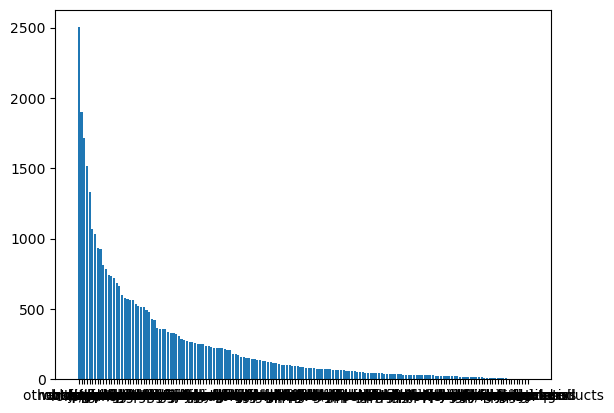

In [50]:
counts = data['itemDescription'].value_counts()
plt.bar(counts.index, counts.values)

In [51]:
null_values = data.isnull().sum()

print(null_values)

rows_with_null = data[data.isnull().any(axis=1)]
print(f"Rows with null values:\n{rows_with_null}")

Member_number      0
Date               0
itemDescription    0
dtype: int64
Rows with null values:
Empty DataFrame
Columns: [Member_number, Date, itemDescription]
Index: []


In [64]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

basket = data.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().fillna(0)

basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules.head(10))

C:\Users\admin\AppData\Local\Temp\ipykernel_12664\1984764248.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       antecedents      consequents  antecedent support  consequent support  \
0           (beef)       (UHT-milk)            0.119548            0.078502   
1       (UHT-milk)           (beef)            0.078502            0.119548   
2   (bottled beer)       (UHT-milk)            0.158799            0.078502   
3       (UHT-milk)   (bottled beer)            0.078502            0.158799   
4  (bottled water)       (UHT-milk)            0.213699            0.078502   
5       (UHT-milk)  (bottled water)            0.078502            0.213699   
6    (brown bread)       (UHT-milk)            0.135967            0.078502   
7       (UHT-milk)    (brown bread)            0.078502            0.135967   
8         (butter)       (UHT-milk)            0.126475            0.078502   
9       (UHT-milk)         (butter)            0.078502            0.126475   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010518    0.087983  1.120775               1.0  

<Figure size 1000x500 with 0 Axes>

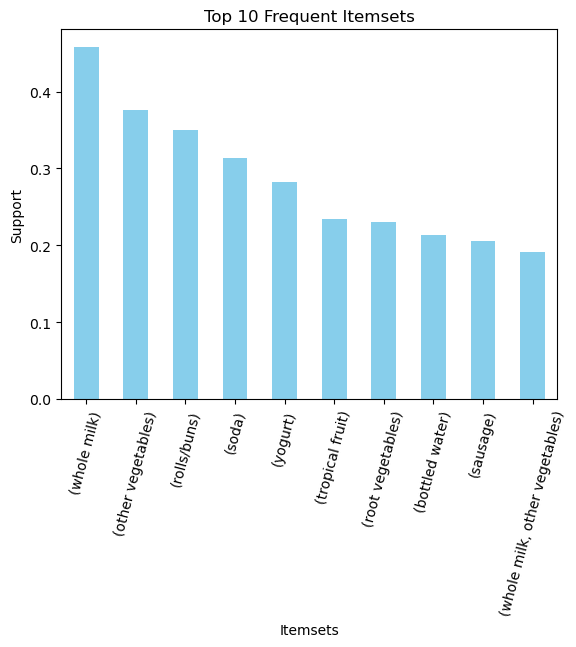

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Graph
plt.figure(figsize=(10, 5))
frequent_itemsets.nlargest(10, 'support').plot(kind='bar', x='itemsets', y='support', legend=False, color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=75)
plt.show()

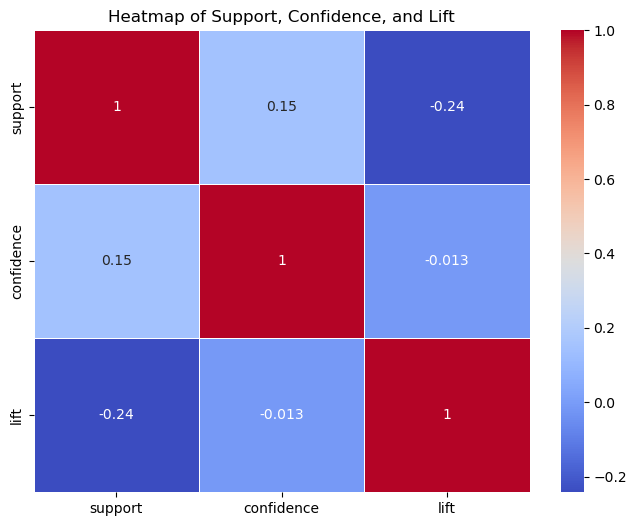

In [73]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rules[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Support, Confidence, and Lift')
plt.show()

In [ ]:
# Line Graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=rules['confidence'], y=rules['lift'], marker='o', color='red')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()